In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df_sentiment = pd.read_csv(r"C:\Users\ssgir\OneDrive\Desktop\Internships\Primetrade.ai\DS_SSG\csv_files\fear_greed_index.csv")
df_trades = pd.read_csv(r"C:\Users\ssgir\OneDrive\Desktop\Internships\Primetrade.ai\DS_SSG\csv_files\historical_data.csv")

In [14]:
print("=== Trader Data Info ===")
print(df_trades.info())
print("\n=== First 5 rows of Trader Data ===")
print(df_trades.head())

print("\n=== Sentiment Data Info ===")
print(df_sentiment.info())
print("\n=== First 5 rows of Sentiment Data ===")
print(df_sentiment.head())


=== Trader Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64


In [15]:
print("\nMissing values in Trader Data:")
print(df_trades.isnull().sum())

print("\nMissing values in Sentiment Data:")
print(df_sentiment.isnull().sum())



Missing values in Trader Data:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Missing values in Sentiment Data:
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [19]:
print("\nUnique Sentiment Classifications:")
print(df_sentiment['classification'].unique())

print("\nUnique Symbols in Trades:")
print(df_trades['Coin'].unique()[:10])  # show first 10



Unique Sentiment Classifications:
['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']

Unique Symbols in Trades:
['@107' 'AAVE' 'DYDX' 'AIXBT' 'GMX' 'EIGEN' 'HYPE' 'SOL' 'SUI' 'DOGE']


In [22]:
df_trades['Coin'].value_counts()[:10]


Coin
HYPE         68005
@107         29992
BTC          26064
ETH          11158
SOL          10691
FARTCOIN      4650
MELANIA       4428
PURR/USDC     2774
WLD           1983
SUI           1979
Name: count, dtype: int64

In [23]:
df_trades.columns = df_trades.columns.str.lower().str.replace(" ", "_")
df_sentiment.columns = df_sentiment.columns.str.lower().str.replace(" ", "_")


In [25]:
print(f"trade cols:{df_trades.columns} \n sent cols:{df_sentiment.columns}")

trade cols:Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp'],
      dtype='object') 
 sent cols:Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [45]:
# Convert IST timestamp to datetime
df_trades['timestamp_ist'] = pd.to_datetime(df_trades['timestamp_ist'], format='%d-%m-%Y %H:%M', errors='coerce')
df_trades['trade_date'] = df_trades['timestamp_ist'].dt.date


In [46]:
df_trades[['timestamp', 'trade_date']].head()


,timestamp,trade_date
0,1970-01-01 00:28:50,2024-12-02
1,1970-01-01 00:28:50,2024-12-02
2,1970-01-01 00:28:50,2024-12-02
3,1970-01-01 00:28:50,2024-12-02
4,1970-01-01 00:28:50,2024-12-02


In [41]:
df_trades['trade_date'] = df_trades['timestamp'].dt.date
df_sentiment['sentiment_date'] = df_sentiment['date'].dt.date


C:\Users\ssgir\AppData\Local\Temp\ipykernel_13472\776845317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['sentiment_date'] = df_sentiment['date'].dt.date


In [42]:

print("Before cleaning:", df_sentiment['classification'].unique())


df_sentiment['classification'] = (
    df_sentiment['classification']
    .str.strip()         
    .str.lower()         
    .str.capitalize()   
)


print("After cleaning:", df_sentiment['classification'].unique())


Before cleaning: ['Fear' 'Greed']
After cleaning: ['Fear' 'Greed']


C:\Users\ssgir\AppData\Local\Temp\ipykernel_13472\3730082049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['classification'] = (


In [43]:
def simplify_sentiment(x):
    x = x.lower()
    if "fear" in x:
        return "Fear"
    elif "greed" in x:
        return "Greed"
    else:
        return None  # Droping Neutral or any other category

df_sentiment['classification'] = df_sentiment['classification'].apply(simplify_sentiment)


df_sentiment = df_sentiment.dropna(subset=['classification'])

print(df_sentiment['classification'].value_counts())


classification
Fear     1289
Greed     959
Name: count, dtype: int64


C:\Users\ssgir\AppData\Local\Temp\ipykernel_13472\544344874.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['classification'] = df_sentiment['classification'].apply(simplify_sentiment)


In [48]:
df_merged = df_trades.merge(
    df_sentiment[['sentiment_date', 'classification']],
    left_on='trade_date',
    right_on='sentiment_date',
    how='left'
)

print(df_merged.head())
print("Trades without sentiment data:", df_merged['classification'].isna().sum())


                                      account  coin  execution_price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   size_tokens  size_usd side       timestamp_ist  start_position direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   closed_pnl                                   transaction_hash     order_id  \
0         0

In [49]:
df_merged = df_merged.dropna(subset=['classification'])


In [50]:

df_analysis = df_merged.dropna(subset=['classification'])


  classification    closed_pnl
0           Fear  4.096266e+06
1          Greed  4.865301e+06
  classification  win_rate_percent
0           Fear          40.78715
1          Greed          42.03112


C:\Users\ssgir\AppData\Local\Temp\ipykernel_13472\3894929013.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  win_rate = df_analysis.groupby('classification').apply(


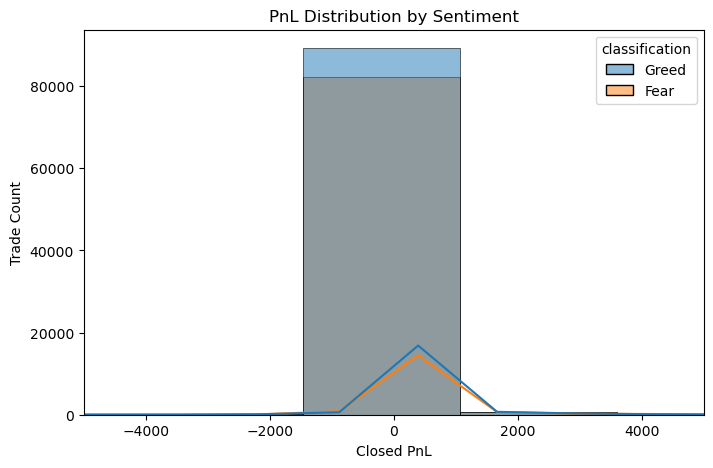

In [54]:
# Total PnL per sentiment
total_pnl = df_analysis.groupby('classification')['closed_pnl'].sum().reset_index()
print(total_pnl)

# % profitable trades per sentiment
win_rate = df_analysis.groupby('classification').apply(
    lambda x: (x['closed_pnl'] > 0).mean() * 100
).reset_index(name='win_rate_percent')
print(win_rate)

# Distribution plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(data=df_analysis, x='closed_pnl', hue='classification', bins=100, kde=True)
plt.xlim(-5000, 5000)  # zoom in to see detail
plt.title('PnL Distribution by Sentiment')
plt.xlabel('Closed PnL')
plt.ylabel('Trade Count')
plt.savefig('outputs/pnl_distribution.png', bbox_inches='tight')
plt.show()


  classification     size_usd
0           Fear  7182.011019
1          Greed  4574.424490
  classification    size_usd
0           Fear  3921430.72
1          Greed  2227114.71
  classification      size_usd
0           Fear  5.978091e+08
1          Greed  4.130477e+08


C:\Users\ssgir\AppData\Local\Temp\ipykernel_13472\3268392632.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_size_usd, x='classification', y='size_usd', palette='coolwarm')


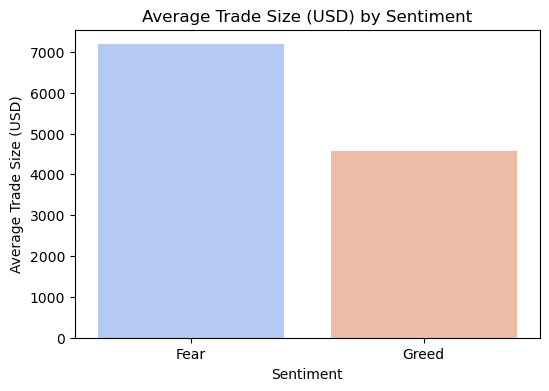

In [55]:
# Average trade size in USD per sentiment
avg_size_usd = df_analysis.groupby('classification')['size_usd'].mean().reset_index()
print(avg_size_usd)

# Max trade size in USD per sentiment
max_size_usd = df_analysis.groupby('classification')['size_usd'].max().reset_index()
print(max_size_usd)

# Volume per sentiment (total USD traded)
total_volume_usd = df_analysis.groupby('classification')['size_usd'].sum().reset_index()
print(total_volume_usd)

# Visualization: Avg trade size
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(data=avg_size_usd, x='classification', y='size_usd', palette='coolwarm')
plt.title('Average Trade Size (USD) by Sentiment')
plt.ylabel('Average Trade Size (USD)')
plt.xlabel('Sentiment')
plt.savefig('outputs/avg_trade_size_by_sentiment.png', bbox_inches='tight')
plt.show()


In [56]:
coin_pnl = df_analysis.groupby(['coin', 'classification'])['closed_pnl'].mean().reset_index()
coin_pnl = coin_pnl.sort_values(by='closed_pnl', ascending=False)
print(coin_pnl.head(10))



       coin classification   closed_pnl
261    PNUT           Fear  1855.649224
288     SEI           Fear   835.600000
163     ENA           Fear   766.994635
155    DOGE           Fear   564.812222
122     ARB           Fear   424.584921
259  PEOPLE          Greed   360.646005
9      @109          Greed   338.348370
319   USUAL           Fear   335.304613
161   EIGEN           Fear   295.631911
96      @85          Greed   288.110217


In [57]:
coin_volume = df_analysis.groupby(['coin', 'classification'])['size_usd'].sum().reset_index()
coin_volume = coin_volume.sort_values(by='size_usd', ascending=False)
print(coin_volume.head(10))


     coin classification      size_usd
144   BTC           Fear  3.376637e+08
145   BTC          Greed  2.081817e+08
194  HYPE           Fear  9.258071e+07
291   SOL           Fear  7.806587e+07
168   ETH          Greed  5.333520e+07
167   ETH           Fear  4.735540e+07
7    @107          Greed  3.737656e+07
292   SOL          Greed  3.089014e+07
195  HYPE          Greed  2.183851e+07
6    @107           Fear  1.066663e+07


C:\Users\ssgir\AppData\Local\Temp\ipykernel_13472\1949546776.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=top10_fear, x='size_usd', y='coin', palette='Blues_r')
C:\Users\ssgir\AppData\Local\Temp\ipykernel_13472\1949546776.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=top10_greed, x='size_usd', y='coin', palette='Oranges_r')


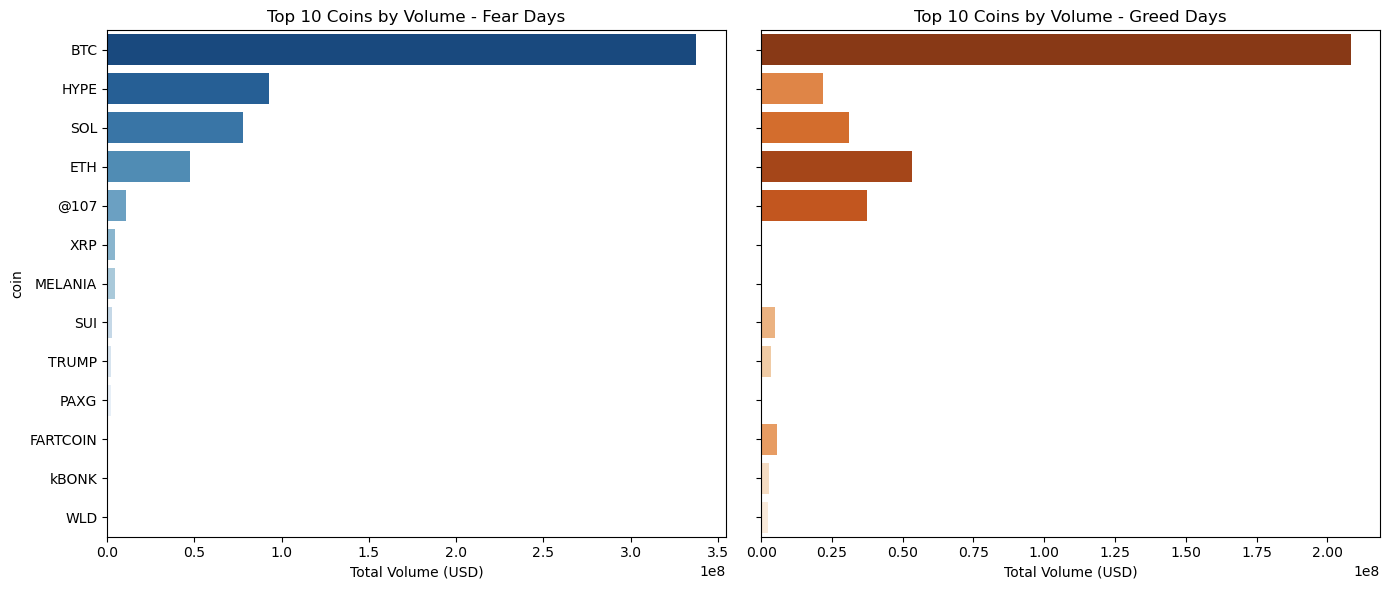

In [58]:
top10_fear = coin_volume[coin_volume['classification'] == 'Fear'].nlargest(10, 'size_usd')
top10_greed = coin_volume[coin_volume['classification'] == 'Greed'].nlargest(10, 'size_usd')

fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

sns.barplot(ax=axes[0], data=top10_fear, x='size_usd', y='coin', palette='Blues_r')
axes[0].set_title('Top 10 Coins by Volume - Fear Days')
axes[0].set_xlabel('Total Volume (USD)')

sns.barplot(ax=axes[1], data=top10_greed, x='size_usd', y='coin', palette='Oranges_r')
axes[1].set_title('Top 10 Coins by Volume - Greed Days')
axes[1].set_xlabel('Total Volume (USD)')

plt.tight_layout()
plt.savefig('outputs/top10_coins_by_sentiment.png', bbox_inches='tight')
plt.show()
